In [21]:
import csv
import pandas as pd
import shap
import sklearn
import numpy as np
import matplotlib
import interpret.glassbox
data = pd.read_csv('cohortpetit.csv')
data2 = pd.read_csv('cohort100.csv')

In [22]:
y = (data['i.coronari'])
data = data.drop(['i.death', 'id', 'i.coronari', 'i.angor', 'i.ami'], axis = 1)

In [23]:
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
# feature_names = [i for i in data.columns ]
X = data[feature_names]
# my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
# model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
# model_ebm.fit(X, y)
##########
X100 = data2[feature_names]

In [24]:
import catboost
from catboost import *
import shap
shap.initjs()

In [25]:
model = CatBoostRegressor(iterations=300, learning_rate=0.1, random_seed=123)
model.fit(X, y, verbose=False, plot=False)

In [26]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [27]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

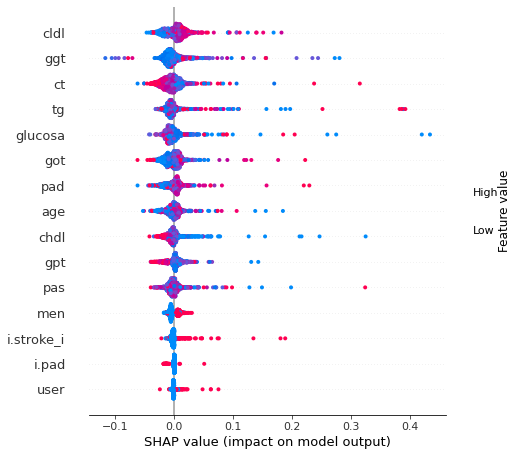

In [28]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)